## AirBnB Listing Analysis

### Data Analytics Project

Analysis of AirBnB listings in Paris to determine the impact of 2015 Regulations over price and accommodations number.

In [31]:
# Importing the libraries to use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Each of the .csv files are ingested into Dataframes

df_listings = pd.read_csv ('./Airbnb Data/Listings.csv', low_memory=False, encoding='ISO-8859-1', parse_dates=['host_since'])
df_reviews = pd.read_csv ('./Airbnb Data/Reviews.csv', low_memory=False, encoding='ISO-8859-1', parse_dates=['date'])

### Examining data

Watching the firsts rows

In [33]:
df_listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [34]:
df_reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


Reviewing Datasets Information

In [35]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [36]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   listing_id   int64         
 1   review_id    int64         
 2   date         datetime64[ns]
 3   reviewer_id  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 164.0 MB


In [37]:
# Mount of values that 'city' column has in 'df_listings'

df_listings['city'].value_counts()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64

In [38]:
# Creating a new Dataframe with specific columns from 'df_listings' table

df_listings_Paris = df_listings[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [39]:
# Leaving just 'Paris' at 'city' column

df_listings_Paris = df_listings_Paris[df_listings_Paris['city'] == 'Paris']

In [40]:
# The new Dataframe 'df_listings_Paris'

df_listings_Paris

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [41]:
# Information of new Dataframe 'df_listings_Paris'

df_listings_Paris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [42]:
# We can notice the mount of missing values at 'host_since' column (which is to small)

df_listings_Paris.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [43]:
# Calculating the minimum, maximum, and average for each numeric field

df_listings_Paris.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [44]:
# Because the minimum in 'accommodates' is '0', it could be an error so we ckeck how many are them

df_listings_Paris.query('accommodates == 0').count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [45]:
# Here we visualize what are the rows that have zero

df_listings_Paris.query('accommodates == 0')


,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0
203261,2020-07-15,Batignolles-Monceau,Paris,0,0
203263,2016-06-07,Palais-Bourbon,Paris,0,0
203264,2020-09-08,Pantheon,Paris,0,0
203265,2020-09-21,Vaugirard,Paris,0,0
203267,2020-10-29,Observatoire,Paris,0,0


We notice that when 'accommodates' is zero, so 'price', which it means that maybe it was an entry mistake. But because the volume of rows with
this condition is low (less than 1%), it's not going to impact our analysis later.

In [46]:
# Let's do the same with 'price' column

df_listings_Paris.query('price == 0').count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [47]:
# Looking where both of these are missing

df_listings_Paris.query('accommodates == 0 and price == 0').count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

### Preparing Data for Visualization

Prices by Neighbourhood

In [48]:
# Creating a new table that groups Paris Listings by 'neighbourhood' and the mean of 'price' (sorted low to high)

df_listings_Paris_neighbourhood = df_listings_Paris.groupby('neighbourhood')['price'].mean().sort_values()

In [49]:
# The new Listings Paris Neighbourhood table

df_listings_Paris_neighbourhood

neighbourhood
Menilmontant            74.942257
Buttes-Chaumont         82.690182
Buttes-Montmartre       87.209479
Reuilly                 89.058402
Popincourt              90.559459
Gobelins                98.110184
Observatoire           101.866801
Batignolles-Monceau    102.612702
Enclos-St-Laurent      102.967156
Vaugirard              106.831330
Opera                  119.038644
Pantheon               122.662150
Temple                 138.446823
Hotel-de-Ville         144.472110
Bourse                 149.496801
Luxembourg             155.638639
Palais-Bourbon         156.856578
Passy                  161.144635
Louvre                 175.379972
Elysee                 210.536765
Name: price, dtype: float64

Prices by Accommodations in the most expensive neighbourhood

In [50]:
# Creating a new table that has the most expensive neighbourhood wich is 'Elysee'

df_listings_Paris_accommodations = df_listings_Paris.query('neighbourhood == "Elysee"')

In [51]:
# Looking at the new table

df_listings_Paris_accommodations

,host_since,neighbourhood,city,accommodates,price
2,2014-07-31,Elysee,Paris,2,89
14,2015-12-30,Elysee,Paris,2,35
128,2015-03-26,Elysee,Paris,2,75
137,2015-08-23,Elysee,Paris,2,90
260,2014-07-18,Elysee,Paris,2,110
...,...,...,...,...,...
278484,2016-07-22,Elysee,Paris,2,98
279043,2016-05-09,Elysee,Paris,2,75
279117,2014-11-20,Elysee,Paris,2,100
279299,2014-09-30,Elysee,Paris,2,87


In [52]:
# Grouping 'df_listings_Paris_accomodations' table by ‘accommodations’ and the mean of 'price' (sorted low to high)

df_listings_Paris_accommodations = df_listings_Paris_accommodations.groupby('accommodates')['price'].mean().sort_values()

In [53]:
# The new Listings Paris Accommodations table

df_listings_Paris_accommodations

accommodates
0       0.000000
1      79.522222
3     152.828767
2     155.103352
4     212.096070
5     328.817073
6     355.508571
8     405.518519
7     411.538462
9     440.272727
10    500.857143
12    529.625000
16    800.000000
11    805.000000
13    842.500000
14    971.000000
Name: price, dtype: float64

Prices by year of becoming a host

In [54]:
# Creating a new table 'df_listings_Paris_over_time' where 'host_since' column is setting as index. It also contains the number of new hosts
# by Year and the mean of price

df_listings_Paris_over_time = (
    df_listings_Paris
    .set_index('host_since')
    .price.resample('Y')
    .agg({
        'neighbourhood':'count',
        'price':'mean'
        })
)

In [55]:
# Looking at the new over time table

df_listings_Paris_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


### Visualize the data and summarize findings

Average Price by Neighbourhood in Paris

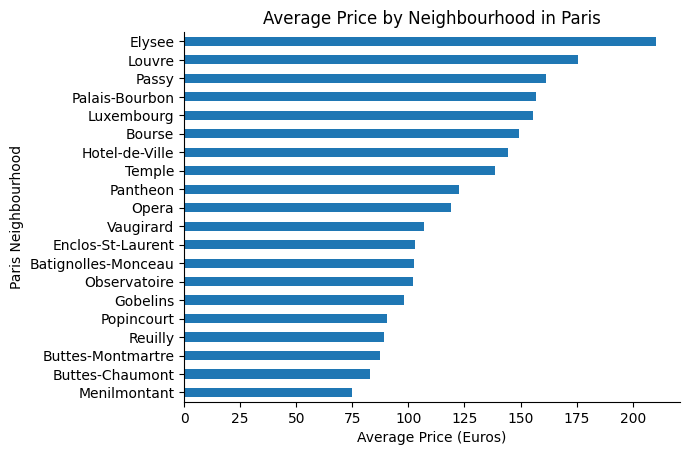

In [56]:
# Horizontal Bar Chart of Average Price by Neighbourhood in Paris

df_listings_Paris_neighbourhood.plot.barh()
plt.title('Average Price by Neighbourhood in Paris')
plt.xlabel('Average Price (Euros)')
plt.ylabel('Paris Neighbourhood')

sns.despine()

Average Price by Accommodates in Paris' most expensive Neighbourhood (Elysee)

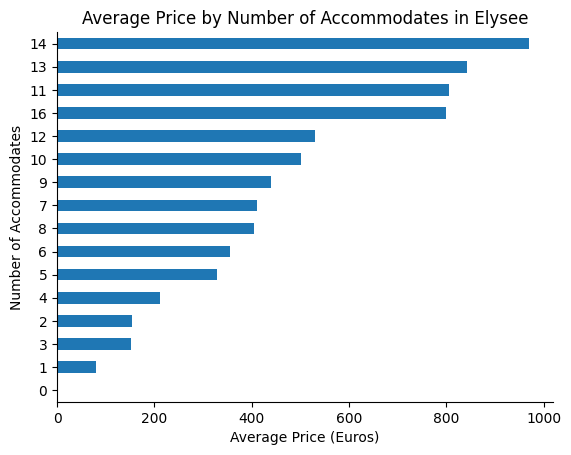

In [57]:
# Horizontal Bar Chart of Average Price by Number of Accommodates in Elysee (the most expensive neighbourhood in Paris)

df_listings_Paris_accommodations.plot.barh()
plt.title('Average Price by Number of Accommodates in Elysee')
plt.xlabel('Average Price (Euros)')
plt.ylabel('Number of Accommodates')

sns.despine()

New Hosts Over Time and Average Price

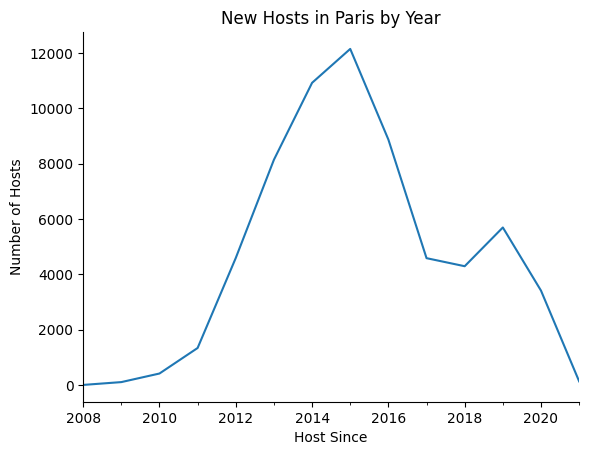

In [58]:
# Line Chart of Number of Hosts by Year

df_listings_Paris_over_time['neighbourhood'].plot()
plt.title('New Hosts in Paris by Year')
plt.xlabel('Host Since')
plt.ylabel('Number of Hosts')

sns.despine()

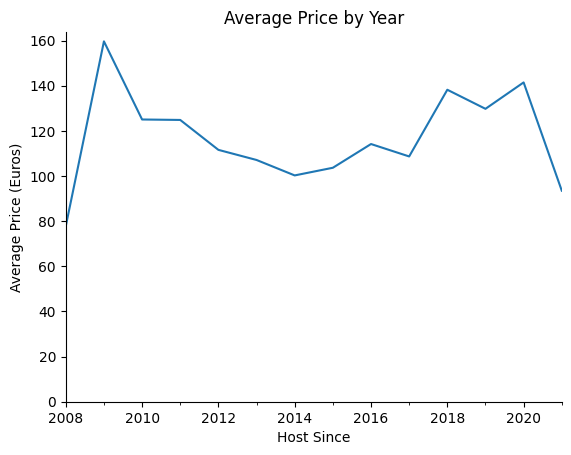

In [59]:
# Line Chart of Average Price by Year

df_listings_Paris_over_time['price'].plot()
plt.title('Average Price by Year')
plt.xlabel('Host Since')
plt.ylabel('Average Price (Euros)')
plt.ylim(0)

sns.despine()

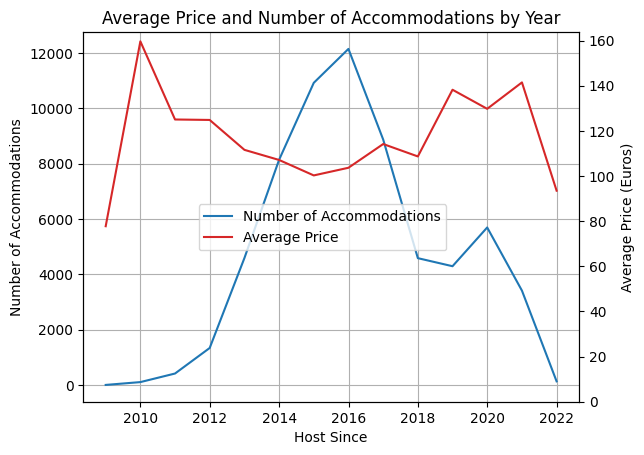

In [60]:
# Dual Axis Line Chart of Both Average Price and Number of Accommodations by Year

# Dividing data into 3 lists
host_since = df_listings_Paris_over_time.index
neighbourhood = df_listings_Paris_over_time['neighbourhood']
price = df_listings_Paris_over_time['price']

fig, ax1 = plt.subplots ()

# Setting parameters of the first axis
color_neighbourhood = 'tab:blue'
ax1.grid()
plt.title ('Average Price and Number of Accommodations by Year')
ax1.set_xlabel ('Host Since')
ax1.set_ylabel ('Number of Accommodations')
ax1.plot (host_since, neighbourhood, color = color_neighbourhood)

# Instantiating a second axis that shares the same x-axis
ax2 = ax1.twinx ()

# Setting parameters of the second axis
color_price = 'tab:red'
ax2.set_ylabel ('Average Price (Euros)')
ax2.plot (host_since, price, color = color_price)
plt.ylim(0)

fig.legend(['Number of Accommodations','Average Price'], loc = 'center')

plt.show()

### Insights

- According to the Analysis performed, it is clear how the number of accommodations decreased starting 2016 when regulations were established (in 2015) to limit new hosts in Paris.


- Prices didn't change significantly through the years, but we can see that starting 2016 there was an increment, maybe because there was less number of accommodates. In 2021, it started to decrease (maybe for recession of Covid in 2020).